In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import dependencies

SEED = 13
NUM_EPOCHS = 1000
LEARNING_RATE = 0.01

Use scikit-learn to load the iris plant dataset

In [12]:

# Load the dataset
iris = load_iris()
# Convert the data to a data frame object for analysis
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
# Analyze the set
print(iris_df.head())
print(iris_df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

Standardize values

In [13]:
from sklearn.preprocessing import StandardScaler
# Separate features and target
features = iris.feature_names
iris_input_features = iris_df[features]
iris_labels = iris_df['target']
# Standardize features
scaler = StandardScaler()
scaled_iris_dataset = scaler.fit_transform(iris_input_features)
# Convert to DataFrame
scaled_iris_df = pd.DataFrame(scaled_iris_dataset, columns=features)
# Analyze the set
print(scaled_iris_df.head())
print(scaled_iris_df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


One hot encode the target variables

In [14]:
print(iris_labels)
encoded_iris_labels = pd.get_dummies(iris_labels).values
print(encoded_iris_labels)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]


Split training and test sets for neural network

In [15]:
from sklearn.model_selection import train_test_split

ft_train, ft_test, label_train, label_test = train_test_split(
	scaled_iris_df.values, encoded_iris_labels, train_size=0.8, test_size=0.2, random_state=SEED
)

Lets create a simple hidden layer

In [16]:
## Use function to initialize parameters for our final network
input_size = ft_train.shape[1]
output_size = label_train.shape[1]

layer_sizes = [input_size, 5, 5, output_size]
iris_10_20_parameters = dependencies.initialize_parameters(layer_sizes)
print(iris_10_20_parameters)

{'W1': array([[-0.50373627,  0.53299332, -0.03146843,  0.31947957,  0.95113054],
       [ 0.37641973,  0.95472702,  0.6089684 ,  1.04558871, -0.73919326],
       [-0.55789949, -0.89209012,  0.39799278, -0.17205764,  0.64611225],
       [ 0.22440099,  0.09001701,  1.52055038,  0.42871082, -0.01893042]]), 'b1': array([[0., 0., 0., 0., 0.]]), 'W2': array([[-0.62243793,  0.75306814,  0.60262299, -0.68759401, -0.09183971],
       [ 0.15043451, -1.0366537 , -0.17590771,  0.88495608, -1.02148397],
       [ 0.31045461,  1.19707529, -0.39274205, -0.2869782 ,  0.1375285 ],
       [ 0.32529013,  0.25123747, -0.95680726, -0.48321751,  0.06404864],
       [-0.20065662,  0.71994503, -0.20372889, -0.23408196,  1.1697977 ]]), 'b2': array([[0., 0., 0., 0., 0.]]), 'W3': array([[-0.05164098, -0.61997992, -0.00151095],
       [-0.14699903,  0.44965994,  0.28660267],
       [-0.21040263, -0.24315239, -0.3354085 ],
       [ 0.8540085 ,  1.27453756, -0.03638668],
       [ 0.35711873,  0.22738819, -0.32379516

Epoch 100/1000, Loss: 0.8036
Epoch 200/1000, Loss: 0.6855
Epoch 300/1000, Loss: 0.5526
Epoch 400/1000, Loss: 0.4336
Epoch 500/1000, Loss: 0.3642
Epoch 600/1000, Loss: 0.3210
Epoch 700/1000, Loss: 0.2885
Epoch 800/1000, Loss: 0.2637
Epoch 900/1000, Loss: 0.2425
Epoch 1000/1000, Loss: 0.2240


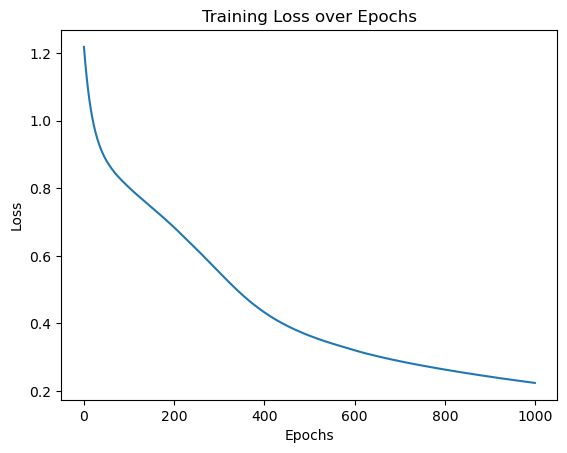

In [17]:
parameters, loss_history = dependencies.train(
    ft_train, label_train, layer_sizes, epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE
)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [18]:
# Make predictions on the test set
predictions = dependencies.predict(ft_test, parameters)
true_labels = dependencies.np.argmax(label_test, axis=1)

# Calculate accuracy
accuracy = dependencies.np.mean(predictions == true_labels)
print(f'Test set accuracy: {accuracy * 100:.2f}%')

Test set accuracy: 96.67%


Epoch 100/1000, Loss: 0.8036
Epoch 200/1000, Loss: 0.6855
Epoch 300/1000, Loss: 0.5526
Epoch 400/1000, Loss: 0.4336
Epoch 500/1000, Loss: 0.3642
Epoch 600/1000, Loss: 0.3210
Epoch 700/1000, Loss: 0.2885
Epoch 800/1000, Loss: 0.2637
Epoch 900/1000, Loss: 0.2425
Epoch 1000/1000, Loss: 0.2240
Dropping feature: sepal length (cm) with accuracy: 0.9417
Epoch 100/1000, Loss: 1.0912
Epoch 200/1000, Loss: 1.0099
Epoch 300/1000, Loss: 0.9440
Epoch 400/1000, Loss: 0.8900
Epoch 500/1000, Loss: 0.8401
Epoch 600/1000, Loss: 0.7751
Epoch 700/1000, Loss: 0.6873
Epoch 800/1000, Loss: 0.5777
Epoch 900/1000, Loss: 0.4852
Epoch 1000/1000, Loss: 0.4051
Dropping feature: petal width (cm) with accuracy: 0.9500
Epoch 100/1000, Loss: 0.8576
Epoch 200/1000, Loss: 0.6841
Epoch 300/1000, Loss: 0.5832
Epoch 400/1000, Loss: 0.5062
Epoch 500/1000, Loss: 0.4496
Epoch 600/1000, Loss: 0.4068
Epoch 700/1000, Loss: 0.3730
Epoch 800/1000, Loss: 0.3441
Epoch 900/1000, Loss: 0.3178
Epoch 1000/1000, Loss: 0.2956
Dropping fea

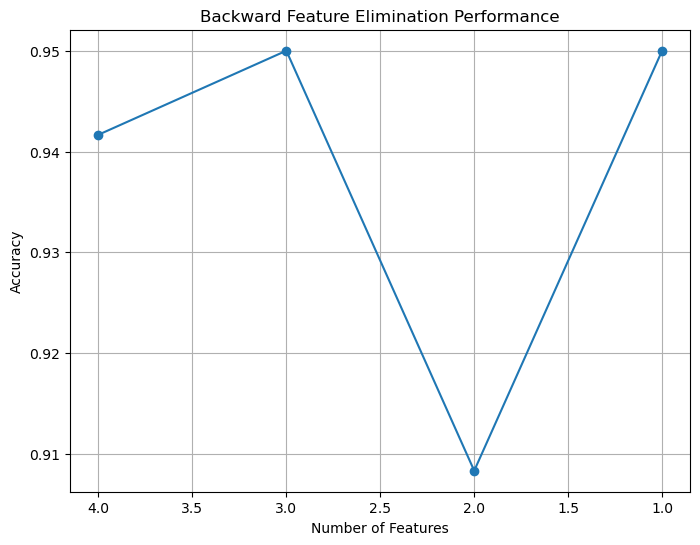

In [19]:
feature_names = iris.feature_names
selected_features, performance_history = dependencies.backward_feature_elimination(
    ft_train, label_train, feature_names, layer_sizes, epochs=1000, learning_rate=0.01, min_features=1
)

print("Selected features after backward feature elimination:", selected_features)

# Plot the performance history
features_count = [item[0] for item in performance_history]
accuracies = [item[1] for item in performance_history]

plt.figure(figsize=(8, 6))
plt.plot(features_count, accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Backward Feature Elimination Performance')
plt.gca().invert_xaxis()  # Invert x-axis to show decreasing number of features
plt.grid(True)
plt.show()